In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import passenger

In [2]:
fastq_path = "input/outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2.fastq.gz"
blast_path = "passenger-blast/outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2.blast.tsv"
prefix = "8a"
query_length = 32
mut_freq_name = prefix+"_mut_freq"
chigy = passenger.CHIGY_LC
max_mutation_count = 10
max_n_count = 10
# 2 or 3 gap segments, which corresponds to 0 or 1 indels
allowable_gap_segment_counts = [2, 3]

In [3]:
passenger.test_summarize_alignment()
passenger.test_correct_alignment()
passenger.test_summarize_alignment()
passenger.test_compute_mutation_counts_by_base()

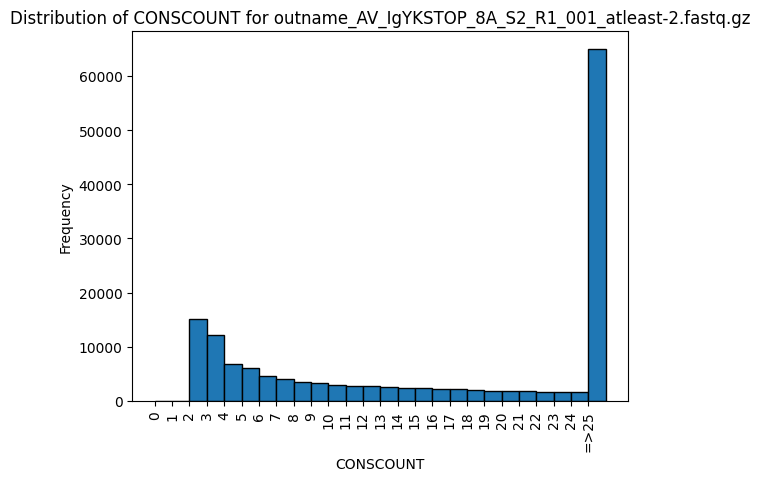

In [4]:
conscounts = passenger.umi_histogram(fastq_path, 25)


In [5]:
blast_df = passenger.blast_df_of_blast_files([blast_path], query_length)

processed_stop_df = chigy.processed_stop_df_of_blast_df(blast_df)

processed_stop_df

Before filtering by length: 33299
After filtering by length: 10810
Note: multiple hits found in BLAST results for passenger-blast/outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2.blast.tsv.
Original length: 10810
After dropping sequences with multiple hits: 10806



,subject,identity,length,mismatches,gap_openings,q_start,q_end,s_start,s_end,evalue,...,dataset,sequence,gap_segment_count,bookended_by_gaps,mutation_positions,mutation_bases,n_positions,mutation_count,n_count,Sequence number
0,GAAGTGGGTTGTCGATT|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,24,55,6.070000e-11,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTTTGTGGTT...,2,True,[],[],"[213, 214, 215, 216, 217, 218, 219, 220, 222, ...",0,20,0
1,AAATCTCTTCCGCTATG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,69,100,6.070000e-11,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAG...,2,True,"[209, 255, 279, 291]","[C, A, A, G]","[49, 295, 297, 319, 321]",4,5,1
2,AGGGACGAAACCGCAGG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,27,58,6.070000e-11,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTTTGTG...,2,True,"[44, 94]","[T, T]","[38, 295, 307, 319, 321]",2,5,2
3,GATCAGGTAGACGGGTT|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,68,99,6.070000e-11,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,AGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAGA...,2,True,"[106, 186]","[T, G]","[3, 210, 295, 319, 321]",2,5,3
4,ATGGAGATGCACAGGGT|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,69,100,6.070000e-11,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GAGCTGCCAGGAGCCTAAGAAGCATNCTCTCTTCCAGCTCTCAGAG...,2,True,"[132, 163]","[C, T]","[295, 306, 319, 321]",2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,CGGCATGGGTAAACAAC|PRCONS=Mus-p5-IgK|CONSCOUNT=...,93.750,32,0,1,1,32,28,57,2.230000e-04,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTGTGG...,2,True,[],[],[],0,0,10801
10802,ACACAAGCAAAGGCGAT|PRCONS=Mus-p5-IgK|CONSCOUNT=...,93.750,32,0,1,1,32,52,81,2.230000e-04,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,6,False,"[1, 2, 4, 5, 6, 8, 9, 11, 12, 23, 25, 27, 28, ...","[G, A, G, C, A, C, C, C, T, G, G, C, G, G, C, ...",[],116,0,10802
10803,AACAGAAGAAGAGGGAA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,93.750,32,0,1,1,32,6,35,2.230000e-04,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GGAGTCACAGACTCAGGTCTTTGGTTGTCTGGTGTTGATGGAGACA...,2,True,"[254, 286]","[C, G]",[],2,0,10803
10804,ACACAAGCAAATGCGAT|PRCONS=Mus-p5-IgK|CONSCOUNT=...,90.625,32,1,1,1,32,52,81,1.400000e-02,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,6,False,"[1, 2, 4, 5, 6, 8, 9, 11, 12, 23, 25, 27, 28, ...","[G, A, G, C, A, C, C, C, T, G, G, C, G, G, C, ...","[59, 295, 321]",117,3,10804


In [6]:
chigy.pretty_print_alignments(processed_stop_df.head())

> outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2 0
--------------------------------------------------------------GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
                                                              |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| ........|.......|.....|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||          
GACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTTTGTGGTTGTCTGGTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGC

In [7]:
# Group by 'dataset' and count the number of rows in each group
row_counts_by_dataset = processed_stop_df.groupby('dataset').size()

# Print the count of rows for each 'dataset'
print(row_counts_by_dataset)


dataset
outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2    10806
dtype: int64


In [8]:
processed_stop_df["mutation_count"].value_counts()[:20].sort_index()

mutation_count
0      313
1     1853
2     2156
3     1723
4     1109
5      720
6      486
7      269
8      170
9       90
10      75
11      43
85      61
86      93
87     129
88     167
89     181
90     187
91     131
92      89
Name: count, dtype: int64

In [9]:
chigy_believable = processed_stop_df[(processed_stop_df["mutation_count"] < max_mutation_count) & (processed_stop_df["n_count"] < max_n_count) & (processed_stop_df["bookended_by_gaps"] == True)].copy()

chigy_believable


,subject,identity,length,mismatches,gap_openings,q_start,q_end,s_start,s_end,evalue,...,dataset,sequence,gap_segment_count,bookended_by_gaps,mutation_positions,mutation_bases,n_positions,mutation_count,n_count,Sequence number
1,AAATCTCTTCCGCTATG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,69,100,6.070000e-11,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAG...,2,True,"[209, 255, 279, 291]","[C, A, A, G]","[49, 295, 297, 319, 321]",4,5,1
2,AGGGACGAAACCGCAGG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,27,58,6.070000e-11,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTTTGTG...,2,True,"[44, 94]","[T, T]","[38, 295, 307, 319, 321]",2,5,2
3,GATCAGGTAGACGGGTT|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,68,99,6.070000e-11,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,AGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAGA...,2,True,"[106, 186]","[T, G]","[3, 210, 295, 319, 321]",2,5,3
4,ATGGAGATGCACAGGGT|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,69,100,6.070000e-11,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GAGCTGCCAGGAGCCTAAGAAGCATNCTCTCTTCCAGCTCTCAGAG...,2,True,"[132, 163]","[C, T]","[295, 306, 319, 321]",2,4,4
5,TTGGAGTACAAAGGATC|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,32,0,0,1,32,69,100,6.070000e-11,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAG...,2,True,"[97, 174, 175, 255, 270, 289]","[A, T, A, C, A, T]","[43, 295, 319, 321]",6,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10797,TTTGATGTATGGGATTA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,93.750,32,2,0,1,32,24,55,3.610000e-06,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GACGCGCGCCTCCACCATGGAGTCACAGACTCCGGTCTTTGAGGTT...,2,True,"[89, 282, 283, 318]","[C, T, T, G]",[],4,0,10797
10800,ACTTTTGGCGGGCTTTA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,96.875,32,0,1,1,32,26,56,3.610000e-06,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTTGTGGT...,2,True,"[145, 277, 280, 317]","[T, A, T, G]",[],4,0,10800
10801,CGGCATGGGTAAACAAC|PRCONS=Mus-p5-IgK|CONSCOUNT=...,93.750,32,0,1,1,32,28,57,2.230000e-04,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTGTGG...,2,True,[],[],[],0,0,10801
10803,AACAGAAGAAGAGGGAA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,93.750,32,0,1,1,32,6,35,2.230000e-04,...,outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2,GGAGTCACAGACTCAGGTCTTTGGTTGTCTGGTGTTGATGGAGACA...,2,True,"[254, 286]","[C, G]",[],2,0,10803


In [10]:
# Find representatives of the various gap counts
representative_gap_counts = chigy_believable.drop_duplicates(subset=["gap_segment_count"])
representative_gap_counts = representative_gap_counts.sort_values(by=["gap_segment_count"])
chigy.pretty_print_alignments(representative_gap_counts)

> outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2 1
-----------------------------------------------------------------------------------------------------------GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
                                                                                                           |||||||||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||.|||||||||||.|||.|.|||||||||||||||||||||.|.          
GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATGGAGTCACAG

In [11]:
chigy_believable = chigy_believable[chigy_believable["gap_segment_count"].isin(allowable_gap_segment_counts)]
chigy_believable["mutation_count"].value_counts().sort_index()

mutation_count
0     310
1    1830
2    2129
3    1677
4    1074
5     689
6     462
7     250
8     159
9      82
Name: count, dtype: int64

In [12]:
# Find representatives of the various gap counts
representative_mutation_counts = chigy_believable.drop_duplicates(subset=["mutation_count"])
representative_mutation_counts = representative_mutation_counts.sort_values(by=["mutation_count"])
chigy.pretty_print_alignments(representative_mutation_counts)

> outname_AV_IgYKSTOP_8A_S2_R1_001_atleast-2 9
-----------------------------------------GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
                                         |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.|||||||||||.|||||||||||.|.          
GACACAGACTCAGGTCTTTGTGGTTGTCTGGTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTA

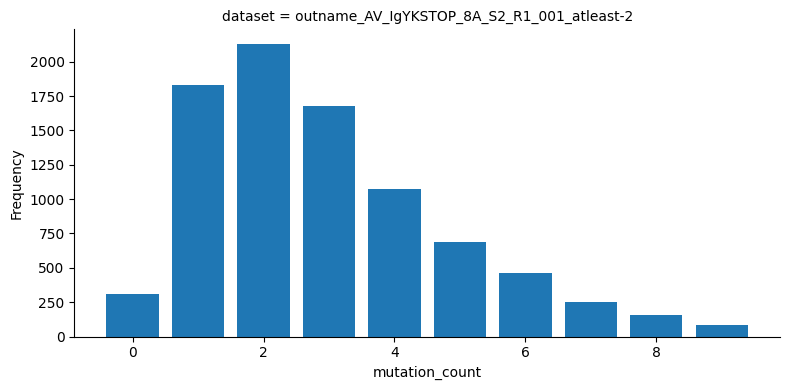

In [13]:
passenger.make_mutation_histogram(chigy_believable)

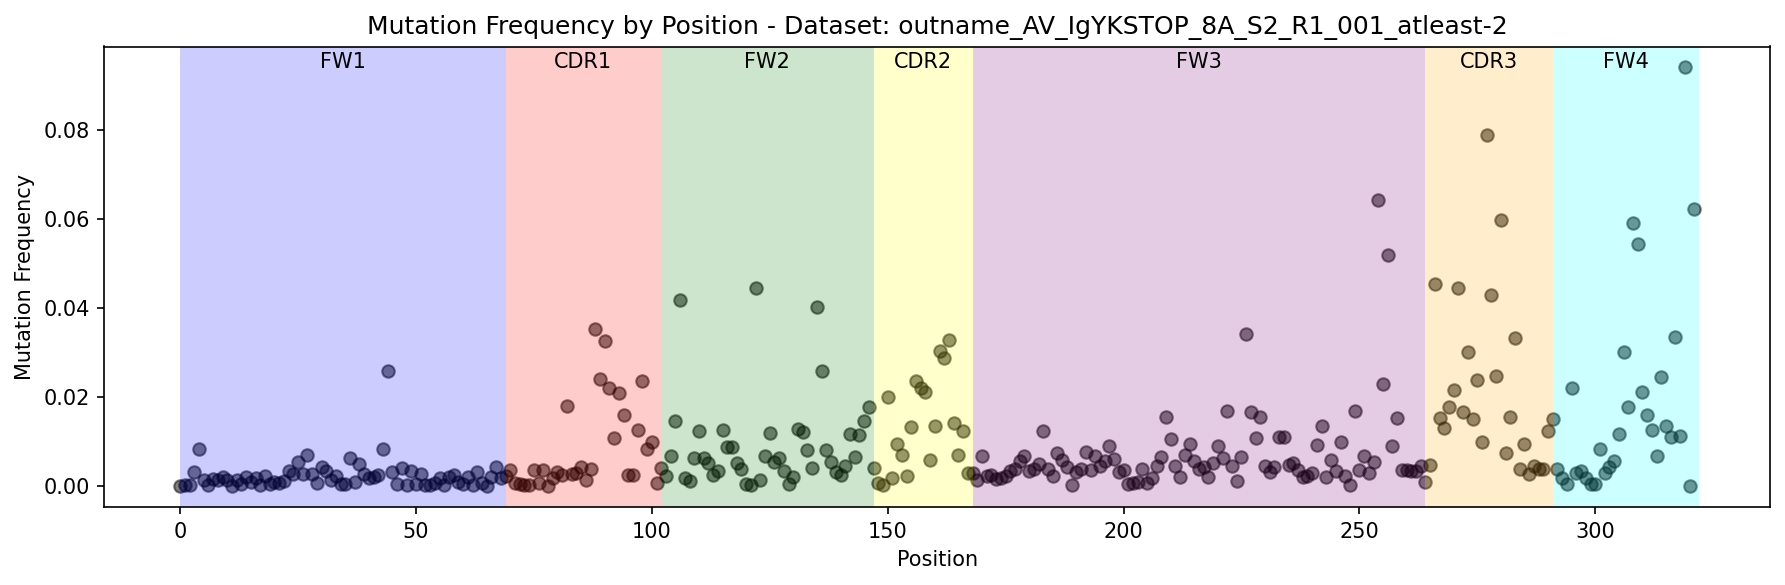

In [14]:
chigy.make_mutation_rate_plot(chigy_believable)


In [15]:
counts_by_base = passenger.compute_mutation_counts_by_base(chigy_believable, chigy.chigy_stop_trimmed)

counts_by_base.to_csv("output/"+prefix+"_counts_by_base.csv")

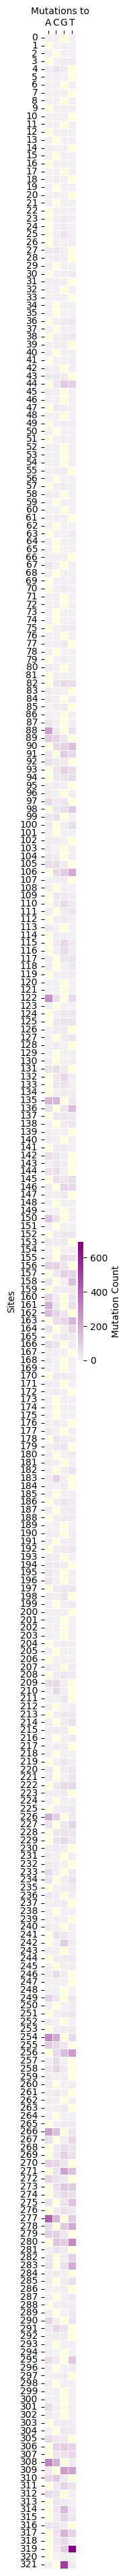

In [16]:
passenger.create_mutation_heatmap(counts_by_base)

In [17]:
counts_by_base.iloc[319]

A     -1
C     21
G    104
T    690
Name: 319, dtype: int64

In [18]:
chigy_believable["sequence"].str[-20:].value_counts()


sequence
GAAATAAAACGGGCTGATGC    6359
GAAATAATACGGGCTGATGC     408
GAAATAAAAGGGGCTGATGC     281
GAAATGAAACGGGCTGATGC     126
GAAATAATAGGGGCTGATGC     120
                        ... 
GAGATAACAGGGGCTGATGC       1
GCAATAAAAGGGGCTGATGC       1
GAAATTANAGGGGCTGATGC       1
GAAATCANANGGGCTGATGC       1
GAAATTGAACGGGCTGATGC       1
Name: count, Length: 193, dtype: int64

In [19]:
n_series = pd.DataFrame({"count of Ns": passenger.compute_thing_counts(chigy_believable, "n_positions")}).sort_values(by="count of Ns", ascending=False)
# set the index name of n_series to be "site"
n_series.index.name = "site"
n_series

,count of Ns
site,
321,258
319,245
295,147
307,76
306,38
...,...
124,0
123,0
122,0


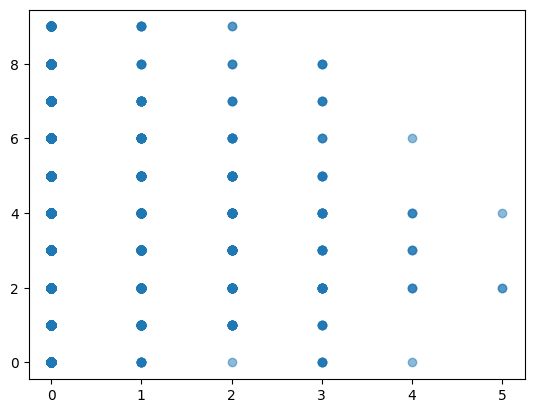

In [20]:
# make a scatter plot of chigy_believable["n_count"] versus chigy_believable["mutation_count"]
plt.scatter(chigy_believable["n_count"], chigy_believable["mutation_count"], alpha=0.5)

In [21]:
padded_seq = "NN" + chigy.chigy_stop_trimmed + "NN"

fivemers = [padded_seq[i:i+5] for i in range(len(padded_seq) - 4)]

pd.DataFrame({"fivemers": fivemers}).to_csv("output/fivemers.csv", index=False)

In [22]:
mutation_frequency_by_position = passenger.mutation_frequency_by_position_of(chigy_believable)
pd.DataFrame({mut_freq_name: mutation_frequency_by_position}).to_csv("output/"+mut_freq_name+".csv", index=False)